In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/influencers.csv', index_col='id')
df.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,MADRID,adrianramos,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,ALICANTE,sofiasantos,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,ELCHE,dianapardo,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,MADRID,luciaserrano,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,ELCHE,dianapardo,12.0,129


Tenemos un tipo de limpieza de datos que directamente elimina los datos que son NaN

In [4]:
df_filtrado = df.dropna()
df_filtrado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,ELCHE,dianapardo,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,MADRID,luciaserrano,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,ELCHE,dianapardo,12.0,129
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,ALICANTE,sofiasantos,982.0,1822
183727,80's & friends! ✈️,158.0,40.0,22.0,MADRID,adrianramos,389.0,258


Limpiar el DataFrame y poner un valor por defecto a todos los datos NaN

In [5]:
df_filtrado = df.fillna(0)
df_filtrado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,MADRID,adrianramos,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,0.0,ALICANTE,sofiasantos,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,ELCHE,dianapardo,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,MADRID,luciaserrano,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,ELCHE,dianapardo,12.0,129


Pudiera ser que necesitemos indicar valores diferentes para los NaN en diferentes columnas.
Indicar valores NaN distintos para cada columna utilizando fillna

In [6]:
df_filtrado = df.fillna({"retweets": 0, "mentions": -1 })
df_filtrado.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,MADRID,adrianramos,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,-1.0,ALICANTE,sofiasantos,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,ELCHE,dianapardo,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,MADRID,luciaserrano,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,ELCHE,dianapardo,12.0,129


Vamos a visualizar los Tweets más populares que tenemos
Queremos mostrar los favoritos mayores a 400 y que tengan más de 20 menciones

In [7]:
df[ (df['favorites'] > 400) & (df['mentions'] >= 20)  ]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183744,Thanks man!,430.0,143.0,28.0,ALICANTE,cristianoronaldo,NaN,351
183745,There is nothing better than programming!,424.0,110.0,29.0,ALICANTE,cristianoronaldo,82.0,351
183746,BORED AF,488.0,28.0,27.0,ELCHE,danicarvajal,21.0,2721


Podemos buscar dentro de contenido de Textos.
Tenemos un método llamado contains que nos permite buscar por contenido en textos

In [8]:
df[ df['full_text'].str.contains("Programming") ]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183733,Programming is the best!,467.0,69.0,10.0,MADRID,adrianramos,389.0,258
183740,Programming is a hot topic!,133.0,145.0,15.0,ALICANTE,cristianoronaldo,82.0,351
183741,Programming? i love it!,92.0,146.0,1.0,MADRID,luciaserrano,332.0,378


DataFrames contiene un método llamado APPLY
Dicho método nos permite realizar acciones sobre una columna (por ejemplo) fila a fila
Para poder utilizar APPLY, se necesita una función para calcular los datos con más código.

def miFunction(valores):
    resultado = valores * 5 + 2
    return resultado

df['COLUMNA'].apply(miFunction)


In [16]:
def multiplicarDoble(menciones):
    doble = menciones * 2
    return doble

#AGREGAMOS UNA NUEVA COLUMNA AL DATAFRAME CON EL DOBLE DE MENCIONES
df['doble_mentions'] = df['mentions'].apply(multiplicarDoble)
df.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees,doble_mentions
id,,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,MADRID,adrianramos,389.0,258,20.0
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,ALICANTE,sofiasantos,982.0,1822,NaN
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,ELCHE,dianapardo,12.0,129,12.0
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,MADRID,luciaserrano,332.0,378,6.0
183725,Welcome back! 🙌,113.0,130.0,9.0,ELCHE,dianapardo,12.0,129,18.0


Vamos a crear una nueva columna que sea la Popularidad del influencer
La popularidad está expuesta por dividir los seguidores entre cuantas personas estoy siguiendo
(followees/followers)
Para poder enviar la FILA del DataFrame en lugar del valor de una columna
se utiliza axis como parámetro dentro de Apply
axis = 1 --> Significa enviar la fila

In [22]:
def popularidad(fila):
    followers = fila['followers']
    followees = fila['followees']
    resultado = followees / followers
    return resultado

df['popularidad'] = df.apply(popularidad, axis=1)
df[df['popularidad'] >= 15]

,full_text,favorites,retweets,mentions,country,user,followers,followees,doble_mentions,popularidad
id,,,,,,,,,,
183735,Buy this product NOW!!,418.0,24.0,2.0,ELCHE,danicarvajal,21.0,2721,4.0,129.571429
183738,hmmm feeling bad today,296.0,93.0,29.0,ELCHE,danicarvajal,21.0,2721,58.0,129.571429
183746,BORED AF,488.0,28.0,27.0,ELCHE,danicarvajal,21.0,2721,54.0,129.571429


Vamos a agrupar por el campo COUNTRY y vamos a mostrar la media de dicho grupo
Dentro de nuestro DataFrame tenemos TEXTOS, no puede darme la media de danicarvajal

In [9]:
df.groupby(['country']).mean(numeric_only=True)

,favorites,retweets,mentions,followers,followees
country,,,,,
ALICANTE,339.909091,91.272727,19.600,616.600,1889.363636
ELCHE,294.857143,77.750000,13.750,15.375,1101.000000
MADRID,186.375000,64.857143,11.875,360.500,318.000000


Imaginemos que necesitamos recuperar la media y la suma de los campos
Media
df.groupby(['country']).mean()
Suma
df.groupby(['country']).sum()
Tenemos una función para los grupos que nos permite mostrar más de un resumen en la misma instrucción:  agg({ "max", "min" })
También nos permite incluir qué columnas queremos mostrar dentro de agg
agg({ columna: "max", columna: "min" })

In [10]:
df.groupby(['country']).agg({
    "followers": "sum",
    "mentions": "mean",
    "retweets": "max"
})

,followers,mentions,retweets
country,,,
ALICANTE,6166.0,19.600,145.0
ELCHE,123.0,13.750,130.0
MADRID,2884.0,11.875,146.0


Podemos filtrar sobre el grupo creado
Quiero mostrar los datos que tengan más de 5.000 seguidores

In [11]:
grupo = df.groupby(['country']).agg({
    "followers": "sum",
    "mentions": "mean",
    "retweets": "max"
})
grupo

,followers,mentions,retweets
country,,,
ALICANTE,6166.0,19.600,145.0
ELCHE,123.0,13.750,130.0
MADRID,2884.0,11.875,146.0


Por supuesto, al igual que podemos leer datos, podemos exportar datos
Vamos a almacenar el grupo dentro de un CSV

In [12]:
grupo.to_csv('data/grupo.csv')
grupo.to_json('data/grupo.json')

Es super sencillo crear gráficos con DataFrame
Directamente se trabaja sobre el DataFrame, no necesitamos tener los datos externos como hemos visto.
El DataFrame tiene un método llamado plot() que nos permite generar los gráficos

In [13]:
import matplotlib.pyplot as plt

Por defecto, el gráfico plot() es el lineal

<Axes: xlabel='country'>

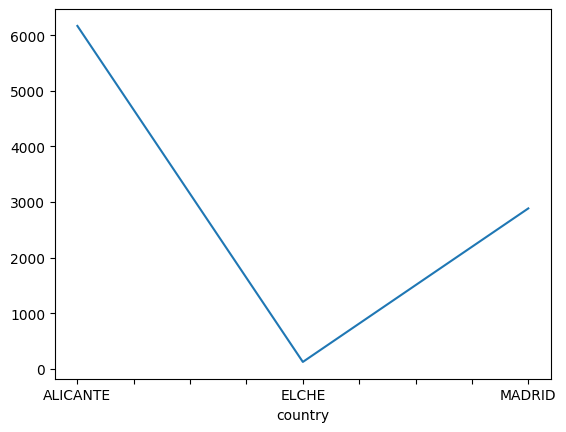

In [14]:
grupo["followers"].plot()

También podemos visualizar otros tipos de gráficos
Simplemente, dentro del método plot() podemos indicar mediante kind="TIPO"
el tipo de gráfico

<Axes: xlabel='country'>

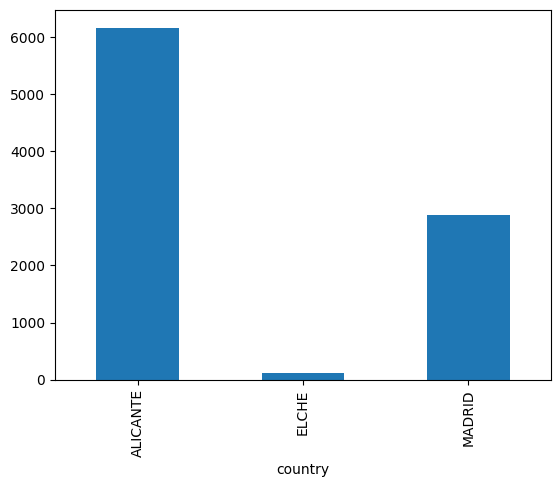

In [15]:
grupo["followers"].plot(kind="bar")

Podemos personalizar el gráfico como hemos visto, indicando los ejes x e y si lo deseamos, apuntando a columnas del pandas Dataframe
Vamos a mostrar un gráfico de dispersión de todo el DF con los favorites y retweets

<Axes: xlabel='favorites', ylabel='retweets'>

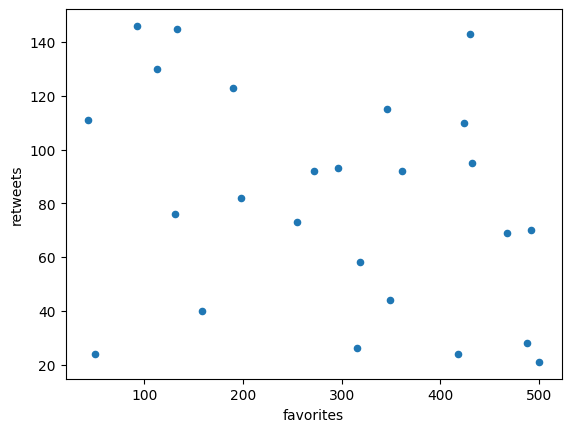

In [16]:
df.plot(kind="scatter", x="favorites", y="retweets")